In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [2]:
data = pd.read_csv("D:/Datasets/diabetes/diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [17]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
int64_col = data.select_dtypes(include = 'int64')
print("Integer Columns: ", int64_col.columns.to_list())
float64_col = data.select_dtypes(include = 'float64')
print("Float Columns : ", float64_col.columns.to_list())
object_col = data.select_dtypes(include = 'object')
print("Object Columns : ", object_col.columns.to_list())
numeric_col = data.select_dtypes('number')
print("Numeric Columns : ", numeric_col.columns.to_list())

Integer Columns:  []
Float Columns :  ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Object Columns :  []
Numeric Columns :  ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [9]:
for column in numeric_col:
    value_counts = data[column].value_counts(dropna = False).reset_index()
    value_counts.columns = ['Value', 'Count']
    print(f"Value counts for column '{column}':\n{value_counts.to_string(index=False)}\n")

Value counts for column 'Diabetes_012':
 Value  Count
   0.0 213703
   2.0  35346
   1.0   4631

Value counts for column 'HighBP':
 Value  Count
   0.0 144851
   1.0 108829

Value counts for column 'HighChol':
 Value  Count
   0.0 146089
   1.0 107591

Value counts for column 'CholCheck':
 Value  Count
   1.0 244210
   0.0   9470

Value counts for column 'BMI':
 Value  Count
  27.0  24606
  26.0  20562
  24.0  19550
  25.0  17146
  28.0  16545
  23.0  15610
  29.0  14890
  30.0  14573
  22.0  13643
  31.0  12275
  32.0  10474
  21.0   9855
  33.0   8948
  34.0   7181
  20.0   6327
  35.0   5575
  36.0   4633
  37.0   4147
  19.0   3968
  38.0   3397
  39.0   2911
  40.0   2258
  18.0   1803
  41.0   1659
  42.0   1639
  43.0   1500
  44.0   1043
  45.0    819
  17.0    776
  46.0    750
  47.0    622
  48.0    484
  49.0    416
  50.0    372
  16.0    348
  51.0    253
  53.0    237
  52.0    215
  55.0    169
  15.0    132
  54.0    113
  56.0    109
  57.0     86
  58.0     71
  79.0

In [19]:
#data["Diabetes_012"]= data["Diabetes_012"].replace({0:"Non-Diabetic",1:"Pre-Diabetic",2:"Diabetic"})

In [20]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,Non-Diabetic,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,Non-Diabetic,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,Non-Diabetic,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,Non-Diabetic,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,Non-Diabetic,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [24]:
import warnings
warnings.filterwarnings("ignore")
data2 = data.copy() 
data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_012[data2['Diabetes_012'] == 0] = 'No Diabetes'
data2.Diabetes_012[data2['Diabetes_012'] == 1] = 'Pre-Diabetes'
data2.Diabetes_012[data2['Diabetes_012'] == 2] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

In [27]:
data2.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,Non-Diabetic,High BP,High Cholesterol,Cholesterol Check in 5 Years,40.0,Yes,No,No,No,No,...,Yes,No,Excellent,18.0,15.0,Yes,Female,60 to 64,Senior High School,"Less Than $10,000"
1,Non-Diabetic,No High,No High Cholesterol,No Cholesterol Check in 5 Years,25.0,Yes,No,No,Yes,No,...,No,Yes,Good,0.0,0.0,No,Female,50 to 54,Magister,"Less Than $10,000"
2,Non-Diabetic,High BP,High Cholesterol,Cholesterol Check in 5 Years,28.0,No,No,No,No,Yes,...,Yes,Yes,Excellent,30.0,30.0,Yes,Female,60 to 64,Senior High School,"$75,000 or More"
3,Non-Diabetic,High BP,No High Cholesterol,Cholesterol Check in 5 Years,27.0,No,No,No,Yes,Yes,...,Yes,No,Fair,0.0,0.0,No,Female,70 to 74,Junior High School,"Less Than $35,000"
4,Non-Diabetic,High BP,High Cholesterol,Cholesterol Check in 5 Years,24.0,No,No,No,Yes,Yes,...,Yes,No,Fair,3.0,0.0,No,Female,70 to 74,Undergraduate Degree,"Less Than $10,000"


Text(0.5, 1.0, 'correlation of feature')

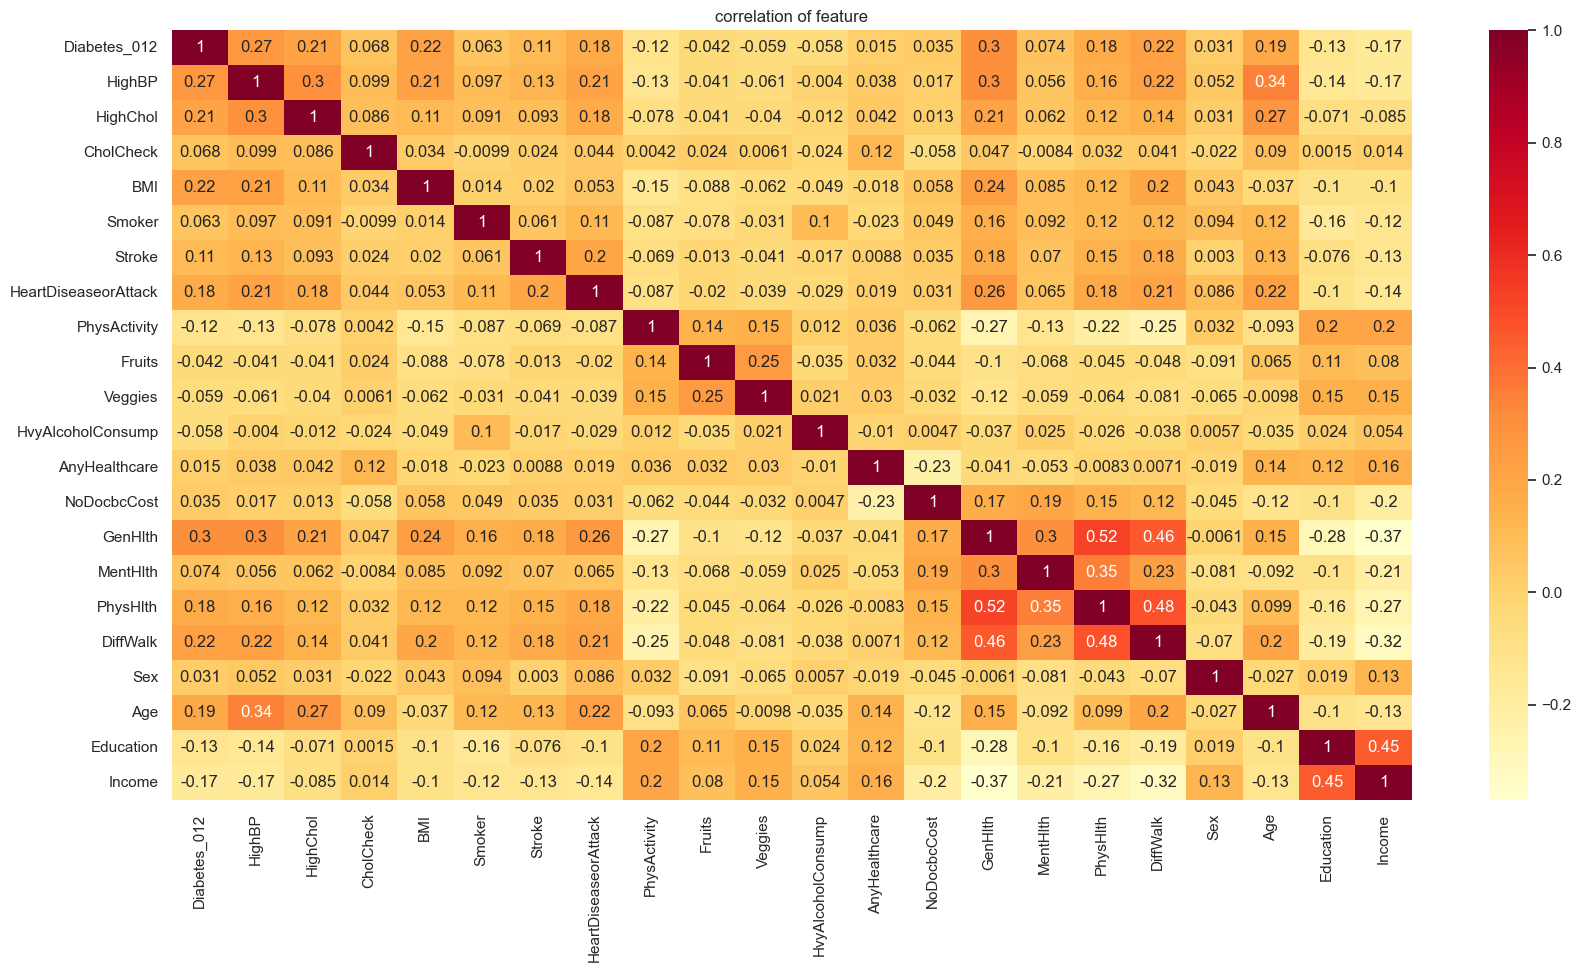

In [29]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

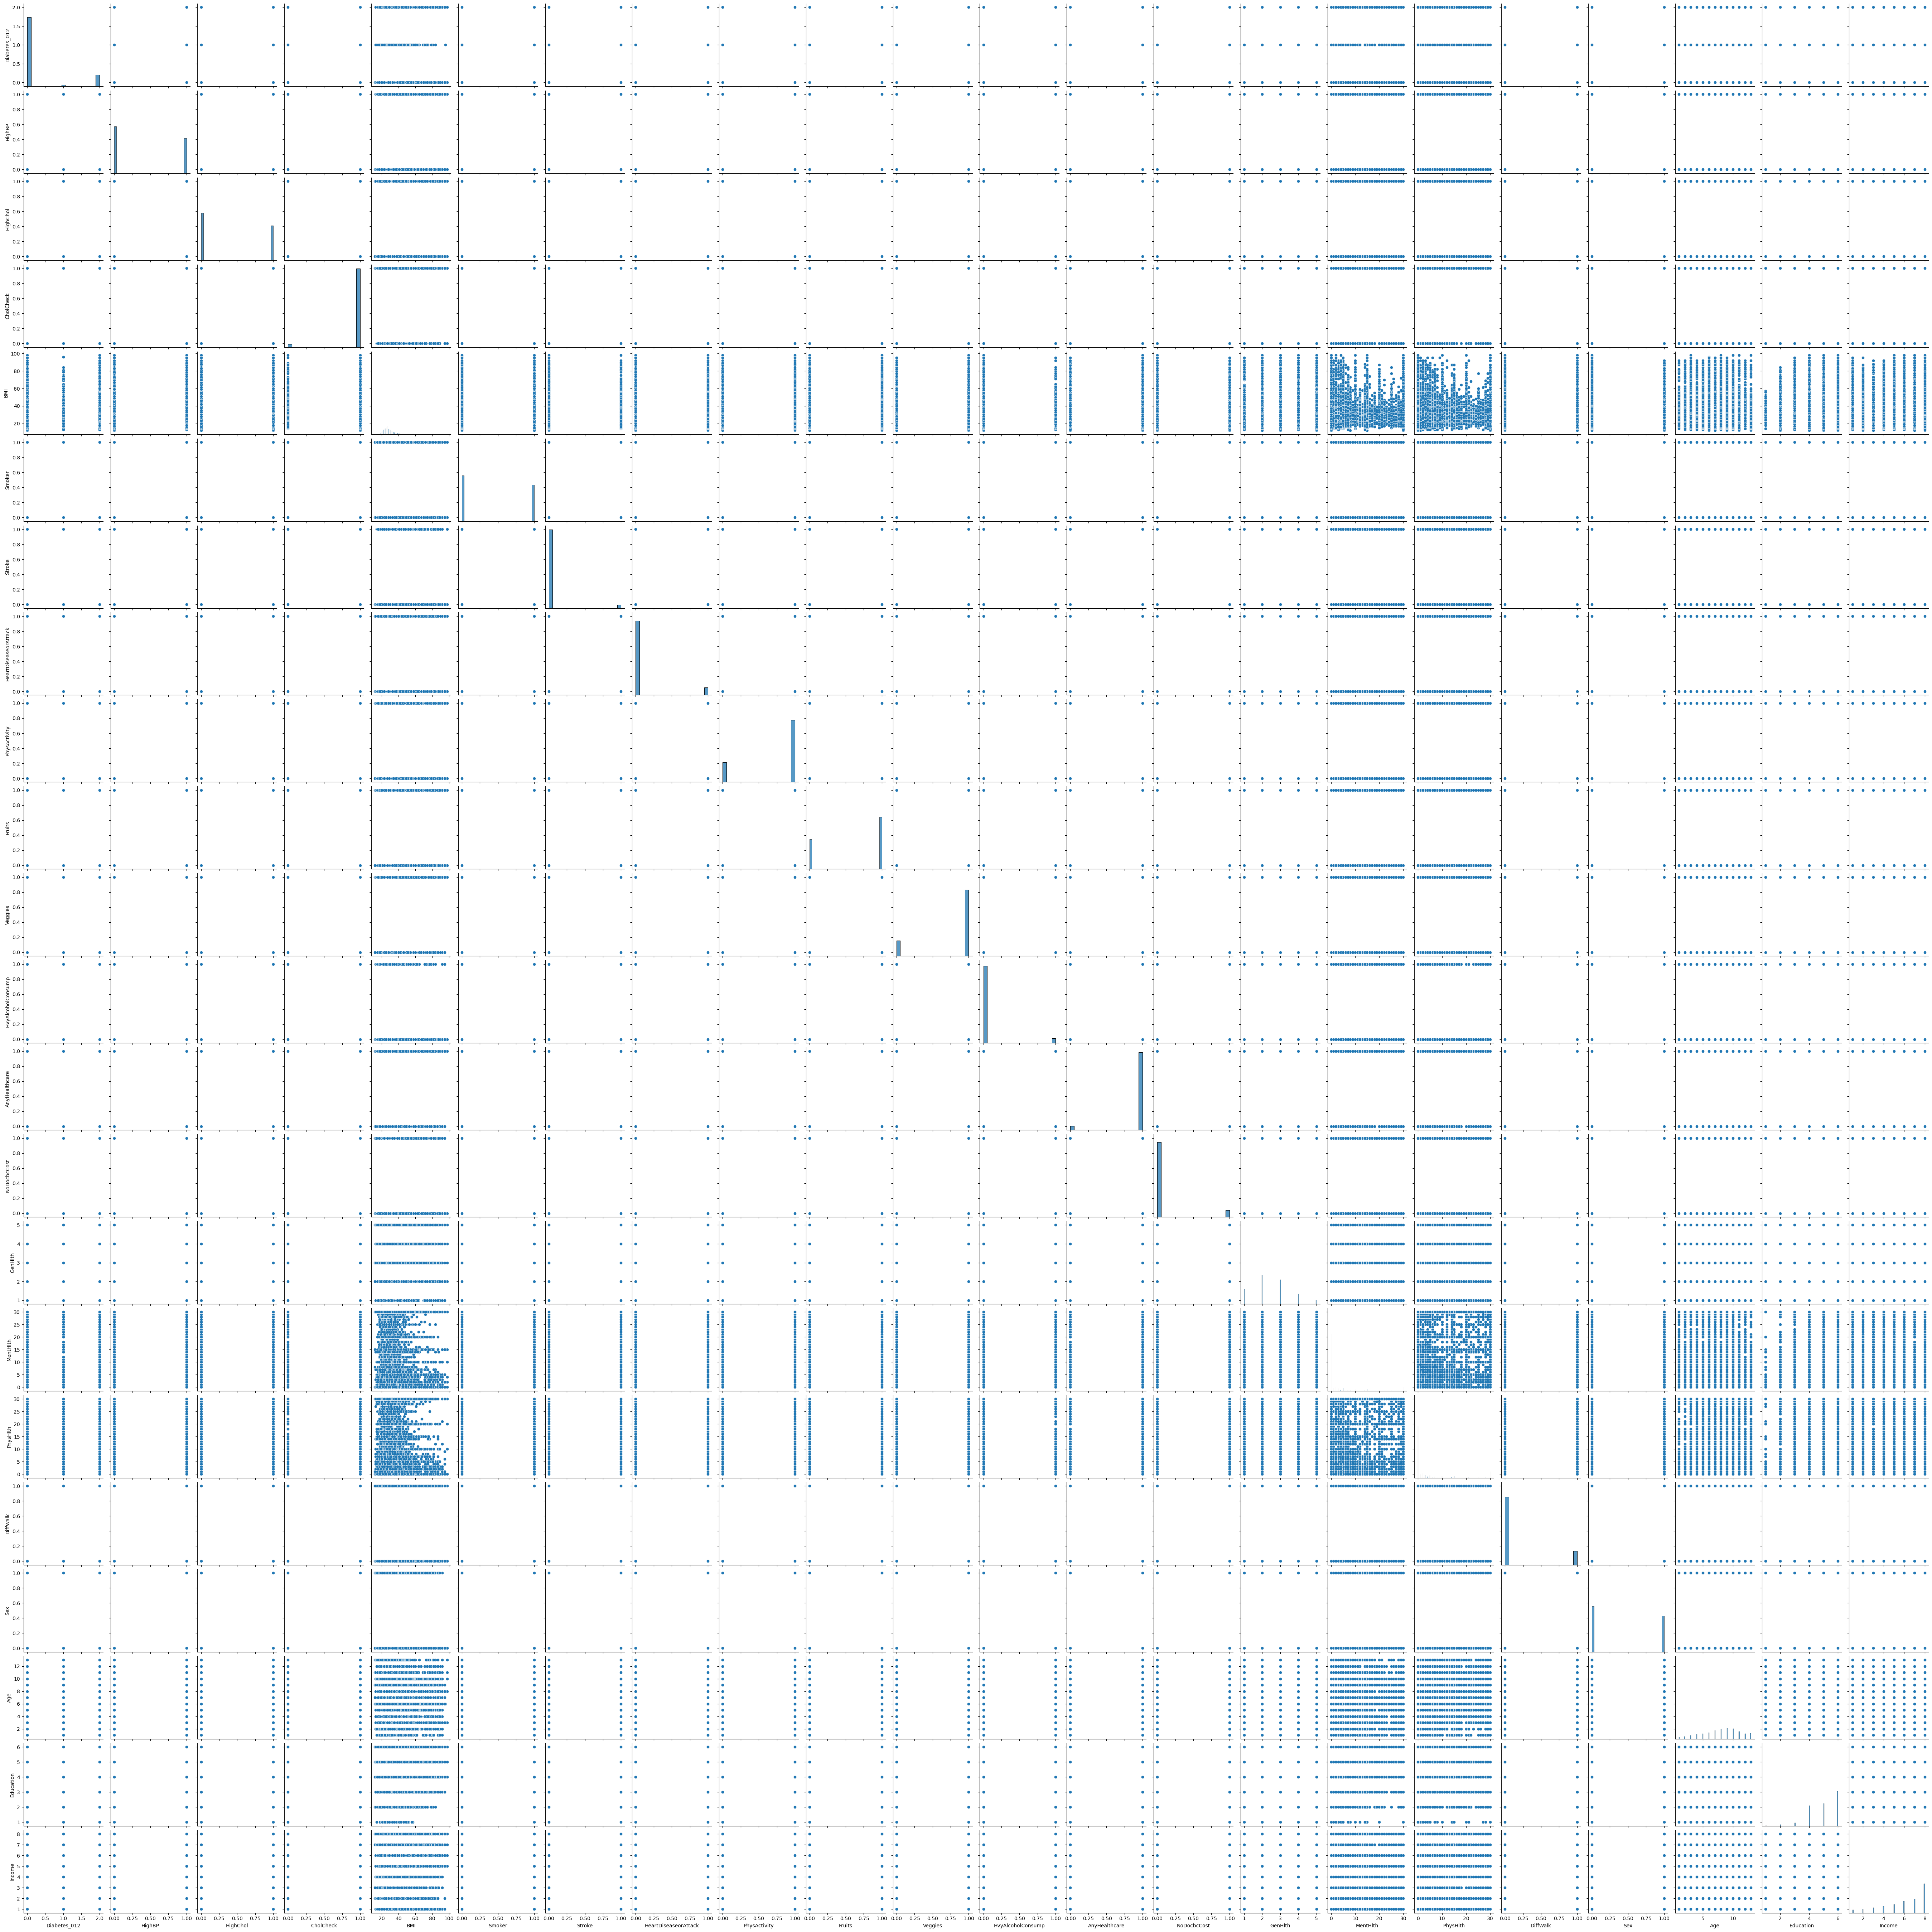

In [14]:
sns.pairplot(data)

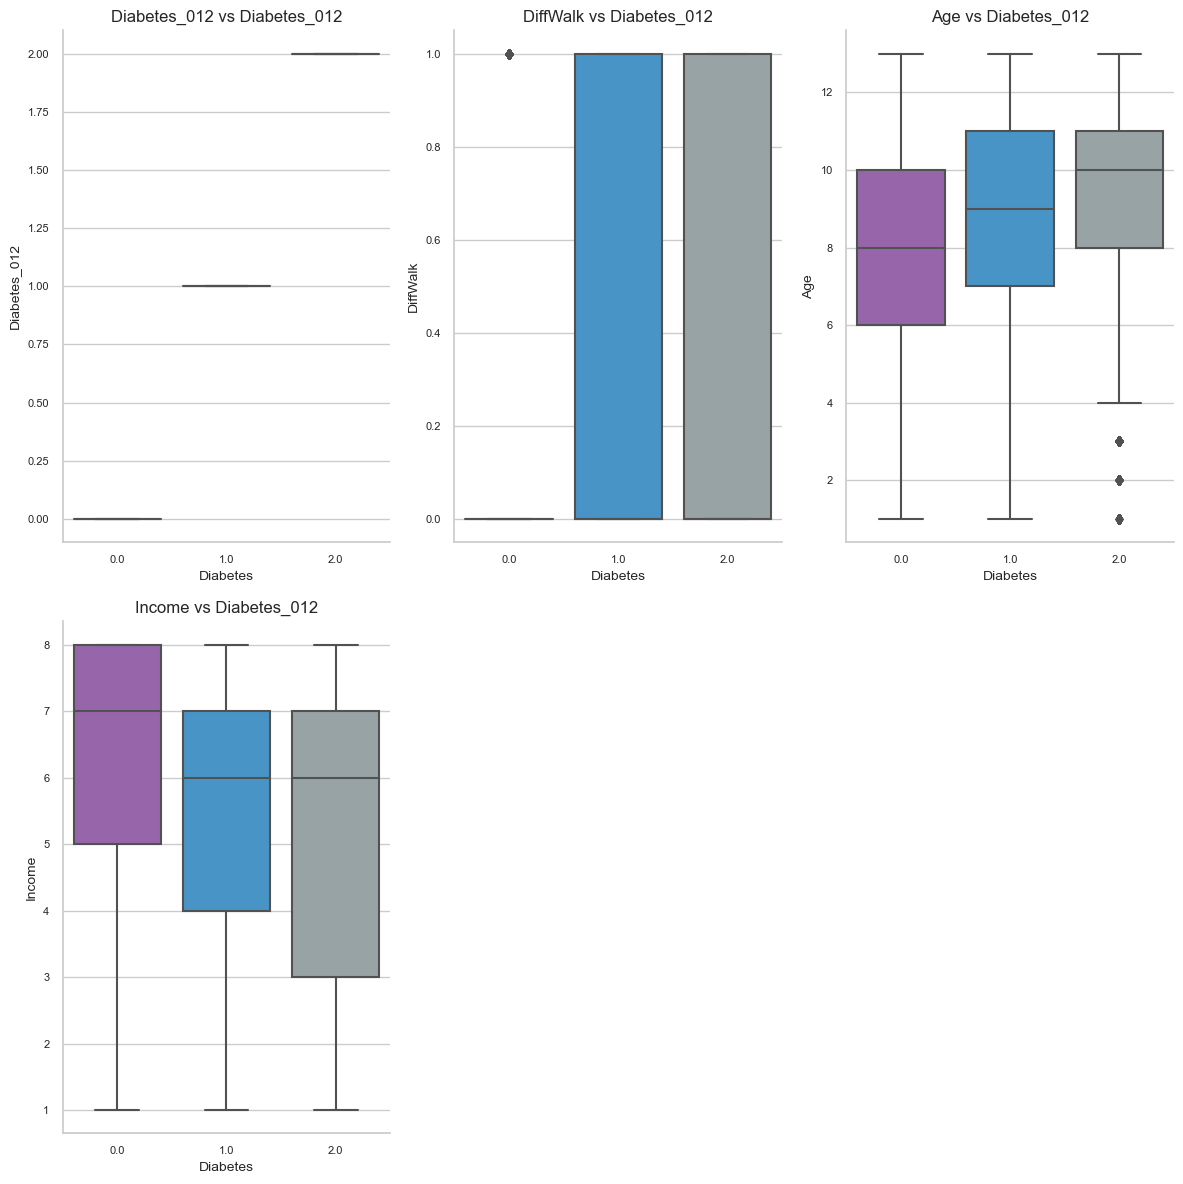

In [36]:
# Define the features and the target variable
features = ['Diabetes_012','DiffWalk', 'Age', 'Income']

# Subset the dataset to include only the required columns
subset_data = data[features]

# Set a custom color palette for the boxplots
custom_palette = ['#9b59b6', '#3498db', '#95a5a6', '#e74c3c', '#2ecc71', '#f1c40f', '#1abc9c', '#c0392b', '#2980b9', '#f39c12']
sns.set_palette(custom_palette)

# Calculate the number of columns for the subplots
num_columns = 3

# Calculate the number of rows required based on the number of features and columns
num_rows = (len(features) + num_columns - 1) // num_columns

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(12, 6*num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Loop through the features and create boxplots
for i, feature in enumerate(features):
    sns.boxplot(x='Diabetes_012', y=feature, data=subset_data, ax=axes[i])
    axes[i].set_title(f'{feature} vs Diabetes_012', fontsize=12)
    axes[i].set_xlabel('Diabetes', fontsize=10)
    axes[i].set_ylabel(feature, fontsize=10)
    axes[i].tick_params(axis='both', labelsize=8)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

# Hide any empty subplots if the number of features is not a multiple of num_columns
if len(features) % num_columns != 0:
    for j in range(len(features), num_rows * num_columns):
        fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

In [10]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Checking Null Values and Handling it:

In [14]:
null_counts = data.isnull().sum()
total_counts = data.count()
dict_1 = {'Total Count' : total_counts, "Null Count" : null_counts}
null_table = pd.DataFrame(dict_1)
null_table.index.name = "Column Names"
null_table

,Total Count,Null Count
Column Names,,
Diabetes_012,253680,0
HighBP,253680,0
HighChol,253680,0
CholCheck,253680,0
BMI,253680,0
Smoker,253680,0
Stroke,253680,0
HeartDiseaseorAttack,253680,0
PhysActivity,253680,0


In [3]:
X = data.drop("Diabetes_012", axis = 1)
y = data["Diabetes_012"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
modelsc = [lj, gnb, cartc, rfc, gbmc, xgbc, lgbmc]

In [5]:
lj = LogisticRegression(solver="liblinear").fit(X_train, y_train)
predict_lj = lj.predict(X_test)
acc_lj = accuracy_score(y_test, predict_lj)
acc_lj

0.8448044780826238

In [33]:
gnb = GaussianNB().fit(X_train, y_train)
predict_gnb = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test, predict_gnb)
acc_gnb

0.7571218332807736

In [34]:
knnc = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
predict_knnc = knnc.predict(X_test)
acc_knnc = accuracy_score(y_test, predict_knnc)
acc_knnc

D:\Anaconda_Software_2\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8187217491853254

In [35]:
cartc = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
predict_cartc = cartc.predict(X_test)
acc_cartc = accuracy_score(y_test, predict_cartc)
acc_cartc

0.7656890570797855

In [36]:
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, predict_rfc)
acc_rfc

0.8404420267003049

In [8]:
gbmc = GradientBoostingClassifier(verbose=False).fit(X_train, y_train)
predict_gbmc = gbmc.predict(X_test)
acc_gbmc = accuracy_score(y_test, predict_gbmc)
acc_gbmc

0.8484310942920215

In [38]:
xgbc = XGBClassifier().fit(X_train, y_train)
predict_xgbc = xgbc.predict(X_test)
acc_xgbc = accuracy_score(y_test, predict_xgbc)
acc_xgbc

0.847918637653737

In [39]:
lgbmc = LGBMClassifier().fit(X_train, y_train)
predict_lgbmc = lgbmc.predict(X_test)
acc_lgbmc = accuracy_score(y_test, predict_lgbmc)
acc_lgbmc

0.8484310942920215

In [7]:
import pickle
pickle.dump(lj,open("diabetes_lj_model.pkl","wb"))

In [19]:
X_test.tail(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
52071,0.0,1.0,1.0,29.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
162826,0.0,1.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,2.0,0.0,1.0,6.0,4.0,3.0
190028,1.0,1.0,1.0,20.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,2.0,30.0,1.0,0.0,12.0,4.0,3.0
139540,0.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,6.0,8.0
178665,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,15.0,15.0,1.0,1.0,10.0,4.0,6.0


In [11]:
y_test

26001     0.0
177967    0.0
206835    0.0
223078    0.0
102735    0.0
         ... 
52071     0.0
162826    2.0
190028    2.0
139540    0.0
178665    0.0
Name: Diabetes_012, Length: 76104, dtype: float64

In [9]:
rows_with_2 = data[data['Diabetes_012'] == 2]

rows_with_2

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
10,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
13,2.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
17,2.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
23,2.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253659,2.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
253668,2.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
253670,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [11]:
lj.predict([[1,1,1,30,1,0,1,0,1,0,1,1,0,5,30,30,1,0,9,4,1]])

array([0.])